### Problem Statement 1

#### 1 Calculate mean,mode, median, standard deviation for the problem statements 1 & 2

#### The marks awarded for an assignment set for a 8 year class of 20 students were as follows
#### 6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8

In [34]:
import numpy as np
from scipy import stats
import math
import statistics 
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import pandas as pd
import scipy.special

In [6]:
marks = np.asarray([6, 7, 5, 7, 7, 8, 7, 6, 9, 7, 4, 10, 6, 8, 8, 9, 5, 6, 4, 8,])

In [12]:
def stats(marks):
    print(f"The Mean of the marks is {np.mean(marks)}")
    print(f"The media of the marks is {np.median(marks)}")
    print(f"The mode of the marks is {statistics.mode(marks)}")
    print(f"The standard deviation of the marks is{np.std(marks)}")
    
stats(marks)

The Mean of the marks is 6.85
The media of the marks is 7.0
The mode of the marks is 7
The standard deviation of the marks is1.5898113095584647


### Problem Statement 2

#### The number of call from motorists per ddy for roadside service was recorded for perticular month:
#### 28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 
#### 97, 75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109

In [17]:
call_records = np.asarray([28,122,217,130,120,86,80,90,140,120,70,40,145,113,90,68,174,194,170,100,75,104,97,75,123,100,75,104,97,75,123,100,89,120,109])

In [18]:
stats(call_records)

The Mean of the marks is 107.51428571428572
The media of the marks is 100.0
The mode of the marks is 75
The standard deviation of the marks is38.77287080168403


### Problem Statement 3

#### The number of times i go to the gym in weekdays, are given below along with its associtiated probability:
#### x = 0,1,2,3,4,5
#### f(x) = 0.09, 0.15, 0.40, 0.25, 0.10, 0.01
#### Calculte the mean number of workouts in a week. and also evalute the variance involved in it.


In [21]:
x = np.asarray([0,1,2,3,4,5])
f_x = np.array([0.09, 0.15, 0.40, 0.25, 0.10, 0.01])

In [27]:
x.reshape(1,-1)
f_x.reshape(-1,1)
mean = np.dot(x,f_x)
variance_of_x = (x-mean)**2
varance = np.dot(variance_of_x.reshape(1,-1), f_x)
print(f"mean no. of workouts: {mean}")
print(f"variance of workouts: {varance}")

mean no. of workouts: 2.15
variance of workouts: [1.2275]


### Problem Statement 4

#### Let the continuous random variable D denotes the diameter of hole drilled in an aluminimum sheet. The target diameter is achived to be 12.5mm Random distributions in the process often result in inaccuracy

#### Historical data shows that the D can be modelled by the PDF (d)= 20e-20(d-12.5) 𝑑 ≥ 12.5. If a part daimeter 𝑑 ≥ 12.6 mm needs to be scrapped, what is the proportion of those parts? what is the CDF when the diameter of 11 mm? what is your conclusion regarding the praportions of| scrap?

In [29]:
from scipy import integrate 

In [33]:
#  PDF (d)= 20e-20(d-12.5) 𝑑 ≥ 12.5

PDF = lambda d:20*(np.exp((-20*(d-12.5))))
x = 12.6
P_x = integrate.quad(PDF, 12.6, np.inf)
y = 11
CDF = integrate.quad(PDF, -np.inf, y)
print(f"proportion of parts needs to be scrapped when d>12.6 is : {P_x[0]}")
print(f"CDF when d= 11mm is :{CDF[0]}")
print(f"proportion of CDF when d>12.5:{integrate.quad(PDF, 12.5, np.inf)[0]}")

proportion of parts needs to be scrapped when d>12.6 is : 0.13533528323661398
CDF when d= 11mm is :nan
proportion of CDF when d>12.5:1.0000000000000024


C:\Users\Neelakanta S Shiroor\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Neelakanta S Shiroor\anaconda3\lib\site-packages\ipykernel_launcher.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  import sys


#Conclusion 
#it can be concluded that the function is only valid when d >= 12.5
#when d<12.5, the part can be reworked to 12.5 so no scrap in this case.
#PDF is not definde for d=11

### Problem Statement 5

#### A Company manufavtures LED bulbs with a faulty rate of 30%. If i randomly select 6 chosen LEDs, what is the probability of having 2 faulty LEDs in my sample? Calculate the average value of this process. Also evalute the standard deviation associated with it.


a      2.000000
B_a    0.324135
Name: 2, dtype: float64


Text(0, 0.5, 'probability of Fault')

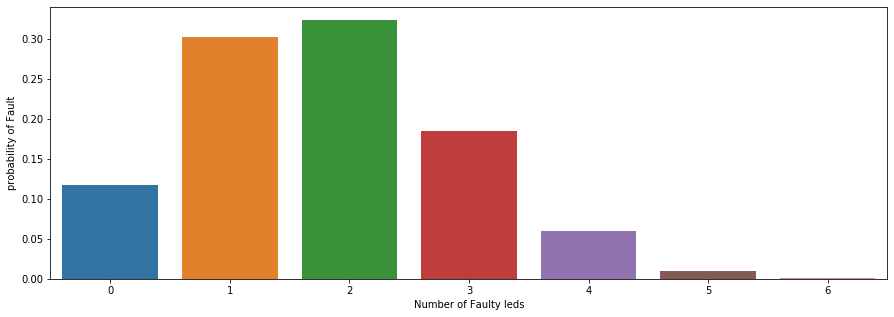

In [35]:
# x = faulty = 0.3
# y = not faulty = 0.7
x = 0.3
y = 0.7
df = pd.DataFrame({'a':[int(i) for i in range(7)],
                  'B_a':[scipy.special.comb(6,i)*(x**i)*(y**(6-i)) for i in range(7)]})
print(df.iloc[2])
plt.figure(figsize=(15,5))
sns.barplot('a', 'B_a', data = df)
plt.xlabel('Number of Faulty leds')
plt.ylabel('probability of Fault')

In [42]:
df['Expected value'] = df['a']*df['B_a']
mean=np.round(df['Expected value'].sum())
print('mean = {}'.format(mean))
df['variance']=df['B_a']*(df['a']-mean)**2
std=np.sqrt(df['variance'].sum())
print(f"Standard Deviation : {np.round(std)}")

mean = 2.0
Standard Deviation : 1.0


### Problem Statement 6

#### Gaurav and barakha are both preparing for entrance exams. Gaurav attempts to solve 8 quetions per day with correction rate of 75%, while batakha averages around 12 quetions per day with correction rate of 45%. What is the probability that each of them will solve 5 questions ? what do you infer from it ? What are the two main governing factors affecting their ability to solve quetions correctly? Give a pictorial representation of the same to validate your answer.

In [58]:
# Guarav- avg=5, p1 = 0.75
# Barakha- avg=5, p2=0.45
# here the both the students are independent to each other, correction rate of one dooes not effect  another one
# G(5)*B(5)

from scipy.stats import binom

print(f"Probability of each of them solving 5 quetions correctly is : {binom.pmf(5,8,0.75)*binom.pmf(5,12,0.45)}")
print(f"Probability of each of them solving 4,6 quetions correctly is : {binom.pmf(4,8,0.75)*binom.pmf(6,12,0.45)}")
#their correction rate effeect their combined probability 

Probability of each of them solving 5 quetions correctly is : 0.04619989057299213
Probability of each of them solving 4,6 quetions correctly is : 0.018374956477894576


In [68]:
# following graphs show their correction rates individually and combined

def binom_plot(n,p,):
    fig,ax = plt.subplots(1,1)
    x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
    ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label = 'binom pmf')
    ax.vlines(x, 0, binom.pmf(x, n, p), colors = 'b', lw = 5, alpha = 0.5)

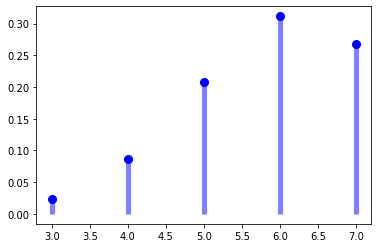

In [69]:
# Guarav
binom_plot(8,0.75)

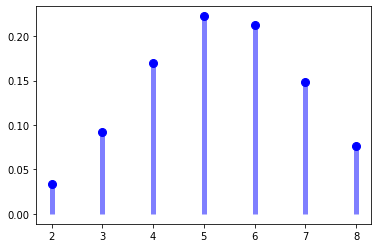

In [70]:
# Barakha
binom_plot(12,0.45)

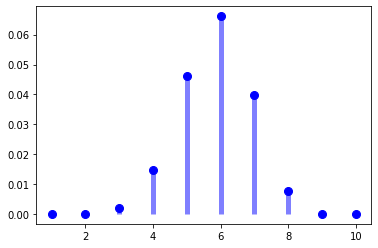

In [74]:

#maximum combined probability observed at 6 question

fig,ax = plt.subplots(1,1)
x = np.arange(1,11)
ax.plot(x, binom.pmf(x,8,0.75)*binom.pmf(x,12,0.45), 'bo', ms=8, label='binom pmf')
ax.vlines(x,0,binom.pmf(x,8,0.75)*binom.pmf(x,12,0.45), colors='b', lw=5, alpha=0.5)


In [75]:
from scipy.stats import binom
binom.pmf(5,8,0.75)*binom.pmf(5,12,0.45)

0.04619989057299213

### Problem Statement 6

#### I work as a data analyst in Aeon Learinng Pvt Ltd. After analyzing data,  i make reports, when i have the efficiency of entering 77 words per minute with 6 errors per hour. What is the probability that i will commit 2 errors in a 455-word financial report ? What happens when the no of words increases/decreases(in case of 1000 words, 255 words)?

#### How is the 𝜆 affected ?
#### How does it influence the PMF?
#### Give a pictorial representation of the same to validate your answer

The pobability of commiting 2 errors in 455 words financial report is :0.09669027375144444
The pobability of commiting 2 errors in 1000 words financial report is :0.23012815007300153
The pobability of commiting 2 errors in 255 words financial report is :0.039377135392854104
The probability of commiting 2 errors in 455 words finacial report is : 0.09669027375144444
The probability of commiting 2 errors in 1000 words finacial report is : 0.23012815007300153
The probability of commiting 2 errors in 255 words finacial report is : 0.039377135392854104


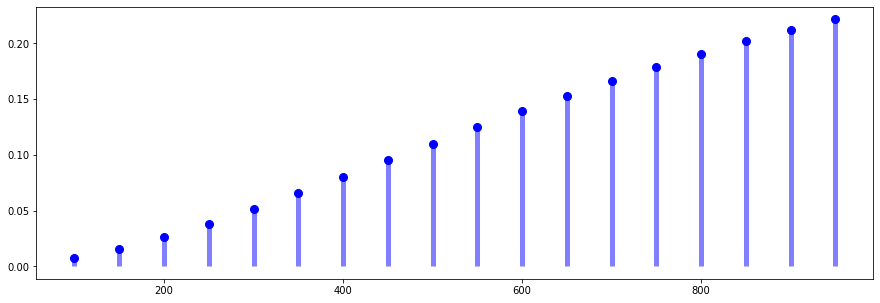

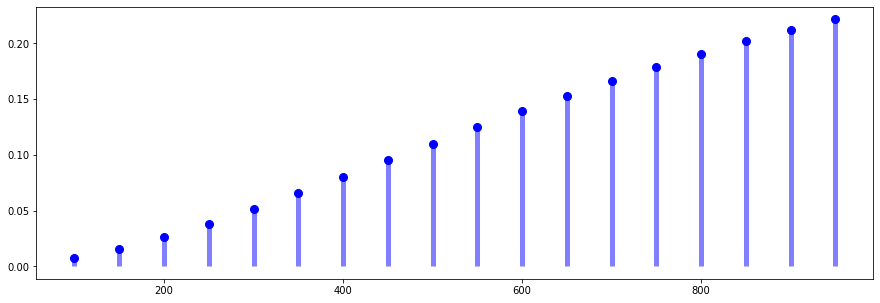

In [77]:
#As the number of words increase probability of getting errors increases

from scipy.stats import poisson
# Rate of entering = 77 per minute
# error rate = 6/hour = 0.1 per minute
# No of errors per word = 0.1/77
unit_mu = 0.1/77
def mu(n):
    return n * unit_mu
print(f"The probability of commiting 2 errors in 455 words finacial report is : {poisson.pmf(2,mu=mu(455))}")
print(f"The probability of commiting 2 errors in 1000 words finacial report is : {poisson.pmf(2,mu=mu(1000))}")
print(f"The probability of commiting 2 errors in 255 words finacial report is : {poisson.pmf(2,mu=mu(255))}")
x = range(100,1000,50)
mu = [i*unit_mu for i in x]
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,poisson.pmf(2,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0, poisson.pmf(2,mu), colors='b', lw=5, alpha=0.5)


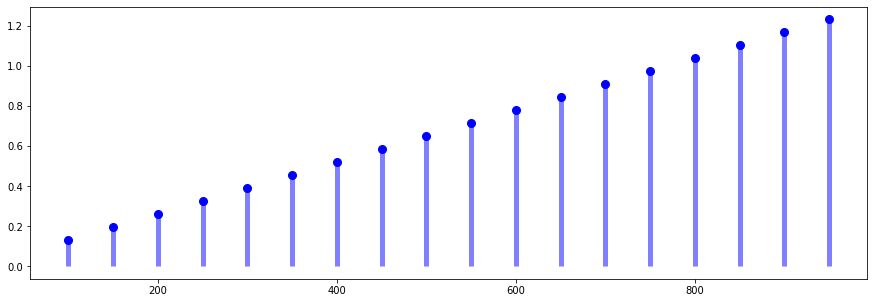

In [81]:


# value of mu keeps on increasing with number of words
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,mu, 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0,mu, colors='b', lw=5, alpha=0.5)

### Problem No.9 is same as problem No.4 

### Problem statement 10

#### Please compute the following:
#### a) P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)
#### b) Find the value 𝑧 such that 𝑃(𝑍 > 𝑧) = 0.05
#### c) Find the value of 𝑧 such that 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99

In [85]:
from scipy.stats import norm
def P(z, b=-np.inf):
    return integrate.quad(norm.pdf,b,z)[0]

print('P(Z>1.26) = % 0.5f'%(1-P(1.26)))
print('P(Z<-0.86) = %0.5f'%P(-0.86))
print('P(Z>-1.37) = %.5f'%(1-P(-1.37)))
print('P(−1.25 < Z < 0.37) = %.5f'%P(0.37,b=-1.25))
print('P(Z ≤ −4.6) = %.5f'%P(-4.6))



P(Z>1.26) =  0.10383
P(Z<-0.86) = 0.19489
P(Z>-1.37) = 0.91466
P(−1.25 < Z < 0.37) = 0.53866
P(Z ≤ −4.6) = 0.00000


In [86]:
print('P(Z>z)=0.05 is %.2f'%(-1*norm.ppf(0.05)))
print('𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is %.2f'%(abs(norm.ppf(0.005))))

P(Z>z)=0.05 is 1.64
𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is 2.58


### Problem statement 11

#### The current flow in a copper wire follow a normal distribution with a mean of 10 mA and a variance of 4(mA)2.

#### What is the probability that a current measurement will exceed 13 mA? What is the probability that a current measurement is between 9 and 11 mA? Determine the current measurement measurement which has a probability of 0.98

In [88]:
mean = 10 
std = np.sqrt(4)

def I(z, b = -np.inf):
    z = (z-mean)/std
    return integrate.quad(norm.pdf,b,z)[0]
print(f"probability that curent > 13mA is:{1-I(13)}")
print(f"probability that current is between 9mA and 11 mA is:{1-I(11,b=9)}")

probability that curent > 13mA is:0.06680720126885797
probability that current is between 9mA and 11 mA is:1.3085375387259144


### Problem statement 12

#### The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch and a standard deviation of 0.0005 inch. The specification of the shaft are 0.2500∓0.0015 inch. What proportion of shaft are in sync with the specifications ? if the process is centered so that the mean is equal to the target value of 0.2500, what proportion of the shaft conform to the new specifications? what is your conclusion from this experiment?

In [91]:
mean_dia = 0.2508
std_dia = 0.0005
# Specified dia in the range of 0.2485<d<0.2515
# case-1 if mean dia = 0.2508
def I(mean,std,a,b):
    #gives P(z<=x)
    a = (a-mean)/std
    b = (b-mean)/std
print(f"Proportion fo shaft with dia in range of 0.2485<d<0.2515 when mean diameter:{0.2508, I(0.2508,0.0005,0.2485,0.2515)}")
print(f"Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:{0.2500,I(0.2500,0.0005,0.2485,0.2515)}")



Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:(0.2508, None)
Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:(0.25, None)
Proportion fo shaft with dia in range of 0.2485<d<0.2515 when mean diameter:(0.2508, None)
Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:(0.25, None)
